In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style




def add_all_a_tags_from_page(page_number):
        url_page =  f'https://www.fifaindex.com/players/fifa21_486/?page={page_number}'
        result = requests.get(url_page)
        doc = BeautifulSoup(result.text, "html.parser")
        a_tags = doc.find_all("a",{"class":"link-player"})
        hrefs = [a['href'] for a in a_tags]
        for single_url in hrefs:
            conact_final_url = "https://www.fifaindex.com" + single_url
            # condition for ignore duplicates
            if conact_final_url not in players_links:
                players_links.append(conact_final_url)

players_links = []
num_of_pages = 550
for i in range(1,num_of_pages+1):                               #On this cell i get all the urls from all pages , each url represents a player
    add_all_a_tags_from_page(i)

print(len(players_links))
#print(players_links)



16500


In [2]:
item_list = [] #List of all players

for link in players_links: 
    url_page = link
    result = requests.get(url_page)
    doc = BeautifulSoup(result.text, "html.parser")
    # # for i in range(1,8):
    overall_and_pot = doc.find_all("span",{"class":"float-right"})[0].text

    test = doc.find_all("h5",{"class":"card-header"})[0].text
    sen_test = "FIFA 22 Rankings "
    if test == sen_test:                                            #Checks if the sentece is shown in the specific url , because there are some urls that its there and some its not.
        name = doc.find_all("h5",{"class":"card-header"})[1].text   #If its there its affect the order of the elements in the url   
        club = doc.find_all("h5",{"class":"card-header"})[2].text
    else:
        name = doc.find_all("h5",{"class":"card-header"})[0].text
        club = doc.find_all("h5",{"class":"card-header"})[1].text


    name = name.replace(overall_and_pot,"")
    p_foot = doc.find_all("span",{"class":"float-right"})[3].text
    age = doc.find_all("span",{"class":"float-right"})[5].text
    work_rate = doc.find_all("span",{"class":"float-right"})[7].text
    position = doc.find_all("span",{"class":"float-right"})[16].text
    # print(name)


    test_end = doc.find_all("span",{"class":"float-right"})
    length_test_end = len(test_end)
    if length_test_end == 54 :   #There are some elements that doesnt appeard in every url , but all the arttibutes appear in sequence ,so the number of the first artti is changing every time.
        a = 20                   #So i check the begginning of the sequence
        z = 54
    elif length_test_end == 55 :
        a = 21
        z = 55
    elif length_test_end == 50 :
        a = 16
        z = 50
    elif length_test_end == 57 :
        a = 23
        z = 57
    else :
        a = 22 
        z = 56 


    attri = []
    for i in range(a,z):
        attri.append(doc.find_all("span",{"class":"float-right"})[i].text)  #I created a list of all the arttibutes of a specific player so it would be more easy to work with.
    
    ball_control = attri[0]
    dribbling = attri[1]
    marking = attri[2]
    slide_tackle = attri[3]
    stand_tackle = attri[4]
    aggression = attri[5]
    reactions = attri[6]
    att_position = attri[7]
    interceptions = attri[8]
    vision = attri[9]
    composure = attri[10]
    crossing = attri[11]
    short_pass = attri[12]
    long_pass = attri[13]
    acceleration = attri[14]
    stamina = attri[15]
    strength = attri[16]
    balance = attri[17]
    sprint_speed = attri[18]
    agility = attri[19]
    jumping = attri[20]
    heading = attri[21]
    shot_power = attri[22]
    finishing = attri[23]
    long_shots = attri[24]
    curve = attri[25]
    fk_acc = attri[26]
    penalties = attri[27]
    volleys = attri[28]
    gk_positioning = attri[29]
    gk_diving = attri[30]
    gk_handling = attri[31]
    gk_kicking = attri[32]
    gk_reflexes = attri[33]

    item = {"Name": name,"Club": club,"Foot": p_foot,"Position": position,"Work-Rate": work_rate,"Age": age,"OVERALL": overall_and_pot,"Ball Control": ball_control,"Dribbling": dribbling,"Marking": marking,"Slide Tackle": slide_tackle,"Stand Tackle": stand_tackle,"Aggression": aggression,"Reactions": reactions,"Att.Position": att_position,"Interceptions": interceptions,"Vision": vision,"Composure": composure,"Crossing": crossing,"short_pass": short_pass,"long_pass": long_pass,"acceleration": acceleration,"stamina": stamina,"strength": strength,"balance": balance,"sprint_speed": sprint_speed,"agility": agility,"jumping": jumping,"heading": heading,"shot_power": shot_power,"finishing": finishing,"long_shots": long_shots,"curve": curve,"fk_acc": fk_acc,"penalties": penalties,"volleys": volleys,"gk_positioning": gk_positioning,"gk_diving": gk_diving,"gk_handling": gk_handling,"gk_kicking": gk_kicking,"gk_reflexes": gk_reflexes}
    item_list.append(item) #append to the list of all players the specific player i work on him right now

df = pd.DataFrame(item_list)
# df.to_csv('test_luther.csv')




    


In [3]:
df.shape

(16500, 41)

In [4]:
df["OVERALL"]

0        92 92
1        92 92
2        91 93
3        91 91
4        91 91
         ...  
16495    58 58
16496    58 76
16497    58 65
16498    58 60
16499    58 66
Name: OVERALL, Length: 16500, dtype: object

In [5]:
def takeOneRating(cell): #The originl dataset comes with overall and potential . so i delete th potential , its not for the proj . 
    old_overall = cell
    size = len(old_overall)
    new_overall = old_overall[:size - 3]
    return new_overall

df["OVERALL"] = df["OVERALL"].apply(takeOneRating) #Reference to function , apply goes on every cell in the column and do the function


In [6]:
df['OVERALL']

0        92
1        92
2        91
3        91
4        91
         ..
16495    58
16496    58
16497    58
16498    58
16499    58
Name: OVERALL, Length: 16500, dtype: object

In [7]:
df.dtypes

Name              object
Club              object
Foot              object
Position          object
Work-Rate         object
Age               object
OVERALL           object
Ball Control      object
Dribbling         object
Marking           object
Slide Tackle      object
Stand Tackle      object
Aggression        object
Reactions         object
Att.Position      object
Interceptions     object
Vision            object
Composure         object
Crossing          object
short_pass        object
long_pass         object
acceleration      object
stamina           object
strength          object
balance           object
sprint_speed      object
agility           object
jumping           object
heading           object
shot_power        object
finishing         object
long_shots        object
curve             object
fk_acc            object
penalties         object
volleys           object
gk_positioning    object
gk_diving         object
gk_handling       object
gk_kicking        object


In [9]:
df[df.columns[0:4]] = df[df.columns[0:4]].astype('str')
df[df.columns[5:41]] = df[df.columns[5:41]].astype('int') #convert string to int

In [10]:
df.dtypes

Name              object
Club              object
Foot              object
Position          object
Work-Rate         object
Age                int32
OVERALL            int32
Ball Control       int32
Dribbling          int32
Marking            int32
Slide Tackle       int32
Stand Tackle       int32
Aggression         int32
Reactions          int32
Att.Position       int32
Interceptions      int32
Vision             int32
Composure          int32
Crossing           int32
short_pass         int32
long_pass          int32
acceleration       int32
stamina            int32
strength           int32
balance            int32
sprint_speed       int32
agility            int32
jumping            int32
heading            int32
shot_power         int32
finishing          int32
long_shots         int32
curve              int32
fk_acc             int32
penalties          int32
volleys            int32
gk_positioning     int32
gk_diving          int32
gk_handling        int32
gk_kicking         int32


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

Name              0
Club              0
Foot              0
Position          0
Work-Rate         0
Age               0
OVERALL           0
Ball Control      0
Dribbling         0
Marking           0
Slide Tackle      0
Stand Tackle      0
Aggression        0
Reactions         0
Att.Position      0
Interceptions     0
Vision            0
Composure         0
Crossing          0
short_pass        0
long_pass         0
acceleration      0
stamina           0
strength          0
balance           0
sprint_speed      0
agility           0
jumping           0
heading           0
shot_power        0
finishing         0
long_shots        0
curve             0
fk_acc            0
penalties         0
volleys           0
gk_positioning    0
gk_diving         0
gk_handling       0
gk_kicking        0
gk_reflexes       0
dtype: int64

In [13]:
cols = ["OVERALL","Ball Control","Dribbling","Marking","Slide Tackle","Stand Tackle","Aggression","Reactions","Att.Position","Interceptions","Vision","Composure","Crossing","short_pass","long_pass","acceleration","stamina","strength","balance","sprint_speed","agility","jumping","heading","shot_power","finishing","long_shots","curve","fk_acc","penalties","volleys","gk_positioning","gk_diving","gk_handling","gk_kicking","gk_reflexes"]
clean_df = df[cols]  #remove all the strings cols from the table , its not nessecery for the future


In [14]:
clean_df.shape

(16500, 35)

In [15]:
corr_matrix = clean_df.corr()
corr_matrix['OVERALL'].sort_values(ascending=False)

OVERALL           1.000000
Reactions         0.842878
Composure         0.625738
shot_power        0.474256
Vision            0.444844
short_pass        0.407540
long_pass         0.404468
Ball Control      0.348893
curve             0.335614
long_shots        0.318389
Aggression        0.312368
Crossing          0.301677
volleys           0.300822
fk_acc            0.297452
Dribbling         0.288309
stamina           0.281117
Att.Position      0.274932
penalties         0.263510
finishing         0.255011
heading           0.245716
strength          0.242925
Interceptions     0.239420
Marking           0.234338
jumping           0.222938
agility           0.203428
Stand Tackle      0.187098
Slide Tackle      0.166865
sprint_speed      0.151112
acceleration      0.143674
balance           0.104470
gk_positioning    0.032782
gk_handling       0.029898
gk_reflexes       0.028767
gk_kicking        0.028568
gk_diving         0.028418
Name: OVERALL, dtype: float64

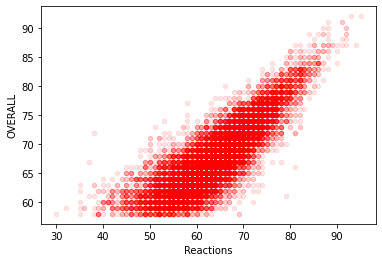

In [16]:
clean_df.plot(kind='scatter', x='Reactions', y='OVERALL', alpha=0.1, color='red') #Scatter plot that shows the connection between Overall and Reactions . 
plt.show()

Text(0, 0.5, 'Frequency')

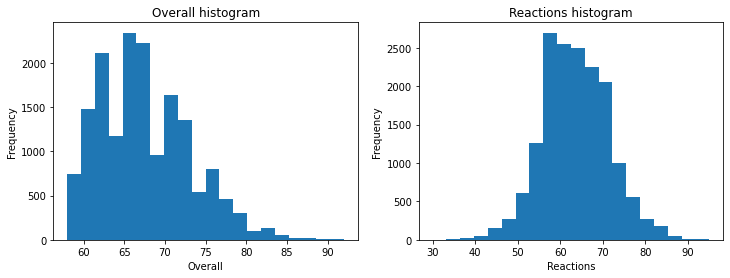

In [17]:
fig = plt.figure(figsize=(12,4)) #From the course
fig1 = fig.add_subplot(1,2,1)
fig2 = fig.add_subplot(1,2,2)

fig1.hist(clean_df.OVERALL,bins=20)
fig1.set_title('Overall histogram')
fig1.set_xlabel('Overall')
fig1.set_ylabel('Frequency')

fig2.hist(clean_df.Reactions,bins=20)
fig2.set_title('Reactions histogram')
fig2.set_xlabel('Reactions')
fig2.set_ylabel('Frequency')



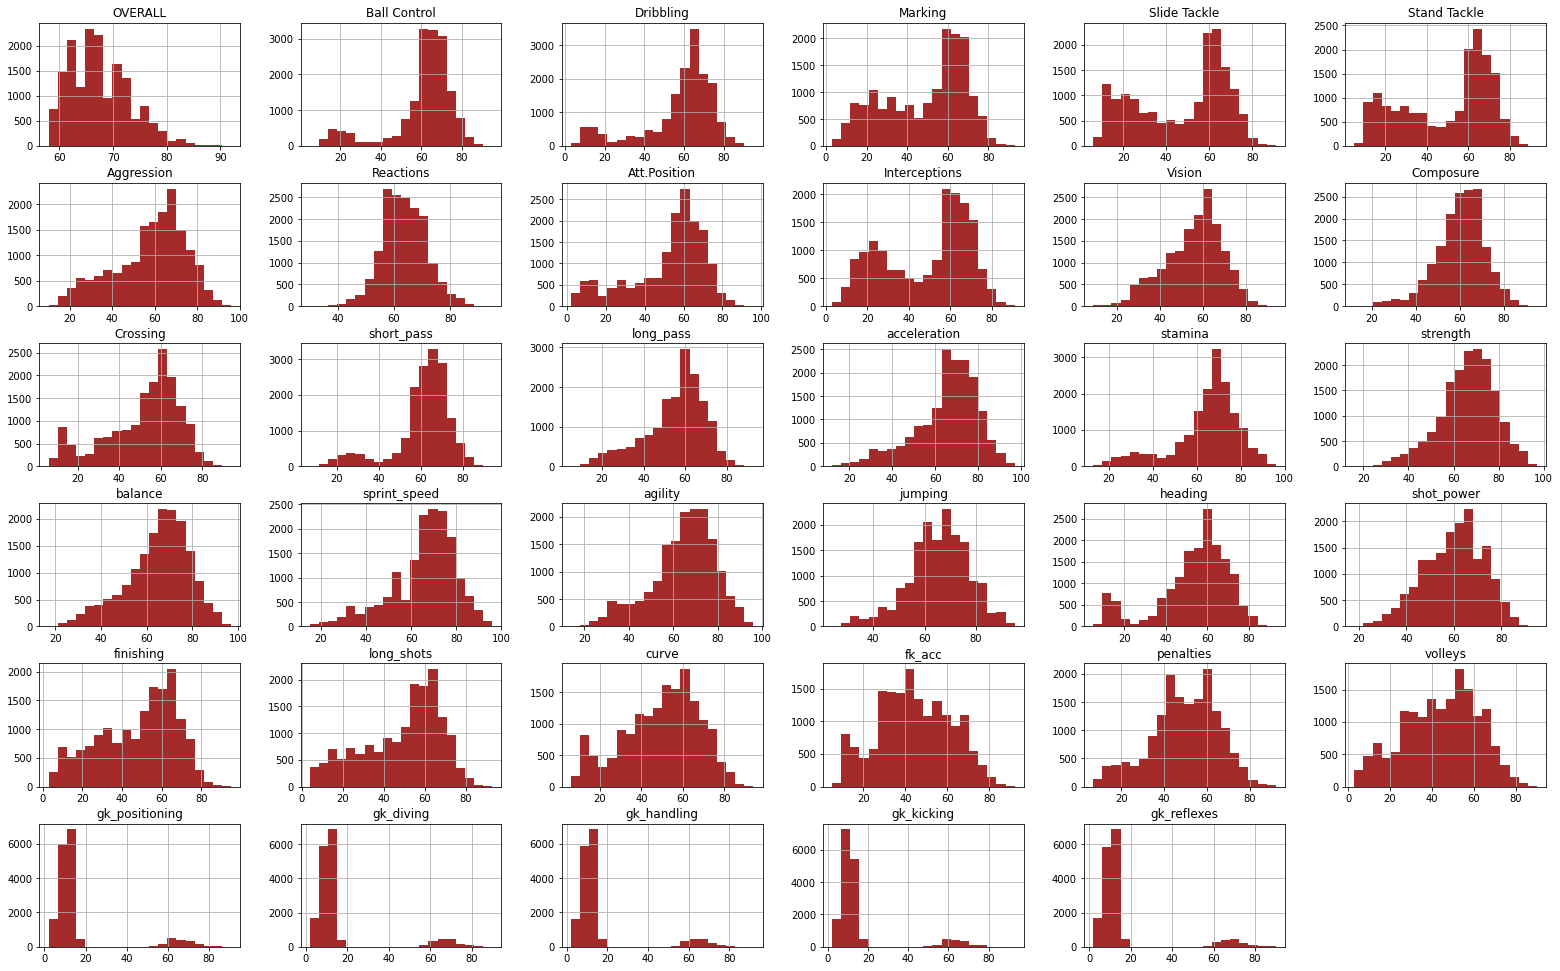

In [18]:
clean_df.hist(bins=20, figsize=(27,17),color='brown')  #Histogram that shows that all the values of the attributes are in range between 0-100 so i dont need to do a scale transformation
plt.show()

In [19]:
clean_df.to_csv('players_attributes.csv')